## Load the standard libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load the data

In [2]:
data = pd.read_csv('Airbnbdataset.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data.shape

(20640, 10)

## Step 3 : Data preprocessing

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
## Check missing values

In [8]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
data.isnull().sum() /len(data) * 100

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

In [10]:
## Dropping the missing values from the data

In [12]:
data = data.dropna()
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [13]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [14]:
data.shape

(20433, 10)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [16]:
data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [20]:
data_ohe = pd.get_dummies(data['ocean_proximity'])
data_ohe

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [21]:
data = pd.concat([data, data_ohe], axis = 1)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0


#### Drop the ocean_proximity column from the data

In [27]:
data = data.drop('ocean_proximity', axis = 1)
data.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


### Check correlation between columns

<Axes: >

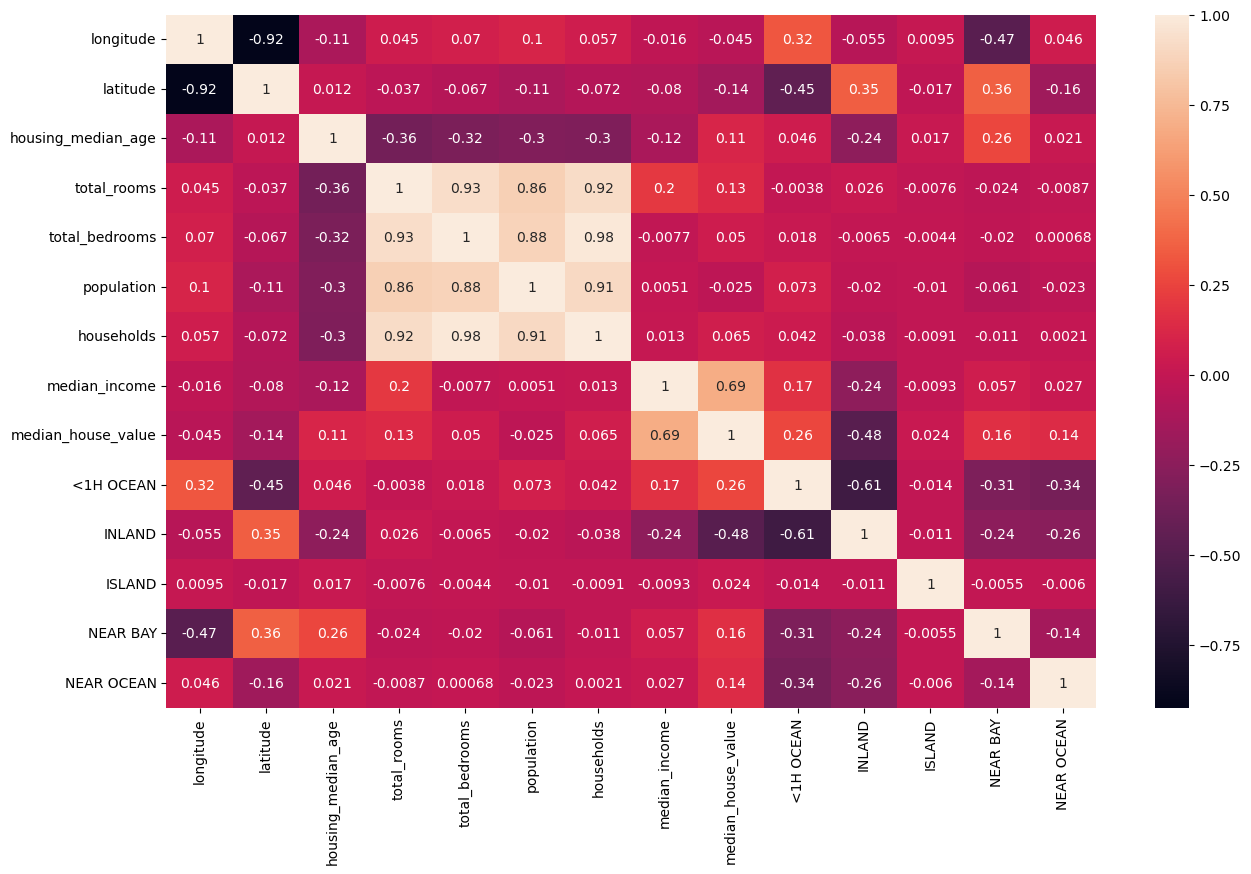

In [24]:
plt.figure(figsize = (15, 9))
sns.heatmap(data.corr(), annot = True)

## dropping lat and long columns from the data as they are not related with target variable

In [26]:
data = data.drop(['longitude', 'latitude'], axis = 1)
data.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0


## Perform Feature Scaling 

In [28]:
data.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [29]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms

MinMaxScaler()

In [30]:
data[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']] = mms.fit_transform(data[['housing_median_age',
                                                                                                                                     'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']])

In [31]:
data.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,452600.0,0,0,0,1,0
1,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,358500.0,0,0,0,1,0
2,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,352100.0,0,0,0,1,0
3,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,341300.0,0,0,0,1,0
4,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,342200.0,0,0,0,1,0


## Step 4: Seperate X and y

In [32]:
X = data.drop('median_house_value', axis = 1)
y = data['median_house_value']

## Step 5 : Split the data into train set and test set

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Step 6 : Apply Linear Regression on X_train and y_train

In [35]:
from sklearn.linear_model import LinearRegression
lr  = LinearRegression()
lr

LinearRegression()

In [36]:
lr.fit(X_train, y_train)

LinearRegression()

## Step 7 : Perfrom predictions

In [38]:
y_pred = lr.predict(X_test)
y_pred

array([197835.25147287, 190521.73408474, 130433.93460276, ...,
       159911.2703599 , 146902.14918369, 234968.53554989])

## Perform Evaluation

In [39]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6372082268798716

In [42]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

4848525793.340262

In [43]:
np.sqrt(mean_squared_error(y_test, y_pred))

69631.35639451713

In [44]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

50590.95972824568

## Root mean Squared error is the most used error metric and is not affected by outliers
## Mean Absolute Error is affected by outliers hence we do not use this error metric